### How good is your model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [17]:
churn = pd.read_csv("telecom_churn_clean.csv")
churn.drop("Unnamed: 0", axis=1,inplace=True)

X = churn.drop("churn", axis=1)
y = churn['churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

### Confusion matrix


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

"""
            pred:0    pred:1
actual:0    TN          FP

acutal 1    FN          TP
"""


[[844  13]
 [110  33]]


'\n            pred:0    pred:1\nactual:0    TN          FP\n\nacutal 1    FN          TP\n'

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.72      0.23      0.35       143

    accuracy                           0.88      1000
   macro avg       0.80      0.61      0.64      1000
weighted avg       0.86      0.88      0.85      1000



### Logistic regression and the ROC curve

Perfect model: 1 for true positive rate, 0 for false positive rate

In [20]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1] #output probability

Text(0, 0.5, 'True positive rate')

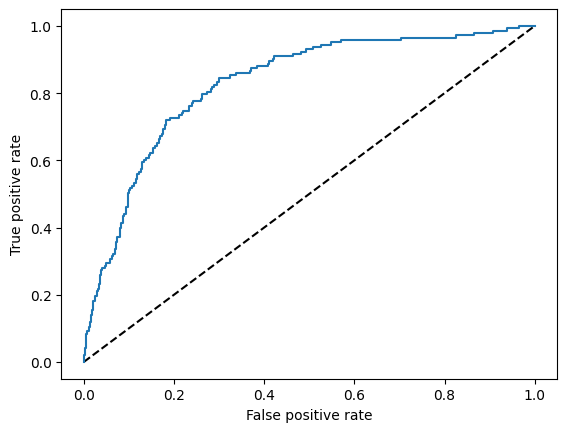

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_probs)


np.float64(0.8281205375721127)

### Hyperparameter tuning
Grid search: fit with each hyparameter set

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV


diabete = pd.read_csv("diabetes_clean.csv")

X = diabete.drop("glucose", axis=1).values
y = diabete['glucose'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': np.float64(0.0001), 'solver': 'lsqr'} 0.3351541736379944


/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random search

In [28]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge , param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': np.float64(0.0001)} 0.3351541736379944


/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hc/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
